# import python libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
from datetime import datetime
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# import csv file

In [7]:
df=pd.read_csv("uber.csv")

In [8]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [11]:
df.shape

(200000, 9)

In [13]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# EDA

C:\Users\info2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


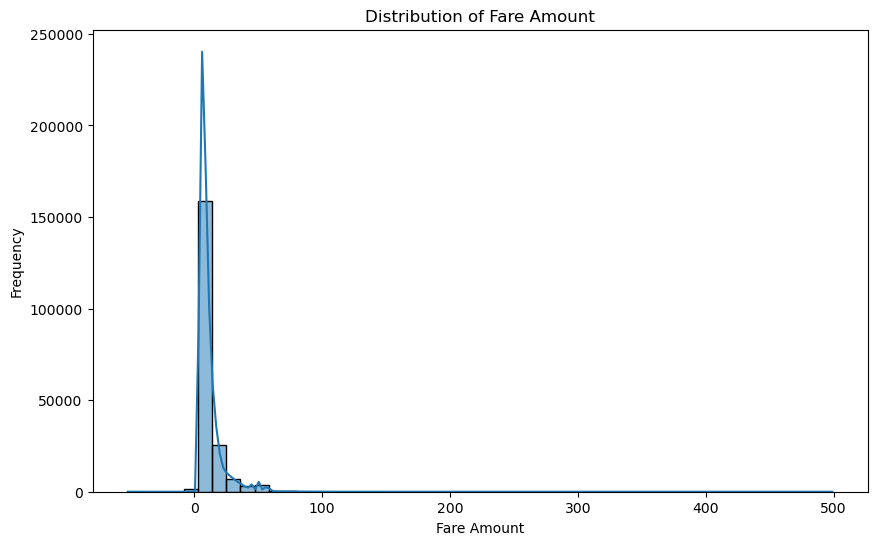

In [17]:
# EDA on fare_amount
# Plot the distribution of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

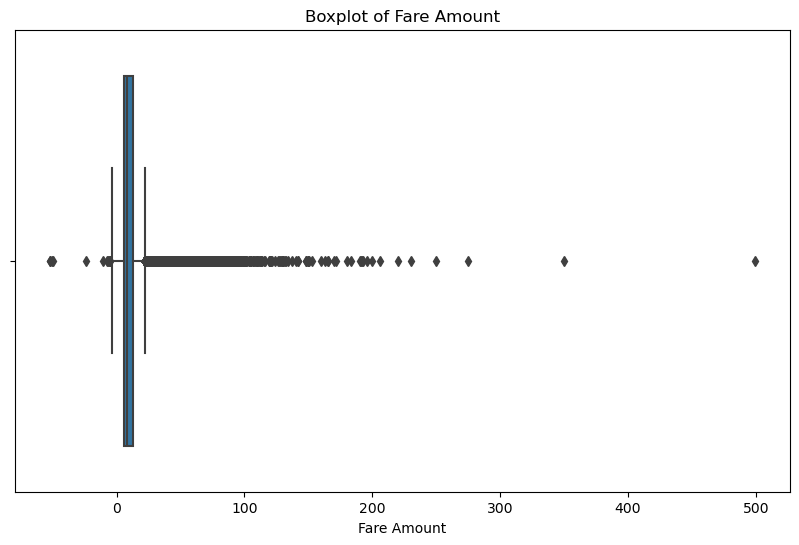

In [18]:
# Boxplot to identify potential outliers in fare_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

In [21]:
# Convert pickup_datetime to datetime format if not already done
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Drop any rows with NaT in pickup_datetime (if necessary)
df = df.dropna(subset=['pickup_datetime'])

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check for any remaining non-numeric values
print("Non-numeric values in numerical columns:")
for col in numerical_df.columns:
    non_numeric = numerical_df[col].apply(lambda x: isinstance(x, str)).sum()
    if non_numeric > 0:
        print(f"{col} contains {non_numeric} non-numeric values")

# Drop rows with non-numeric values in numerical columns
numerical_df = numerical_df.apply(pd.to_numeric, errors='coerce')
numerical_df = numerical_df.dropna()

# Now calculate the correlation matrix
correlations = numerical_df.corr()
print("\nCorrelation matrix:")
print(correlations)


Non-numeric values in numerical columns:

Correlation matrix:
                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000587          0.000230        -0.000341   
fare_amount          0.000587     1.000000          0.010458        -0.008482   
pickup_longitude     0.000230     0.010458          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008482         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002259     0.010158         -0.000415        -0.001559   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002259  
fare_amount                 0.008986         -0.011014         0.010158  
pickup_longitude            0.833026         -0.846324        -0.00

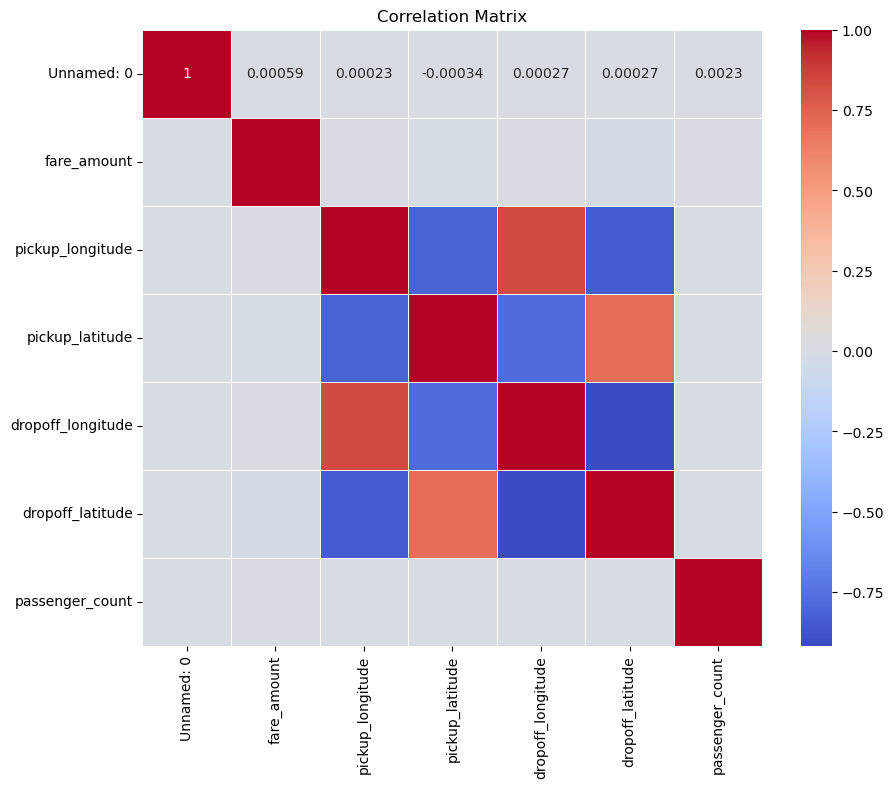

In [22]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

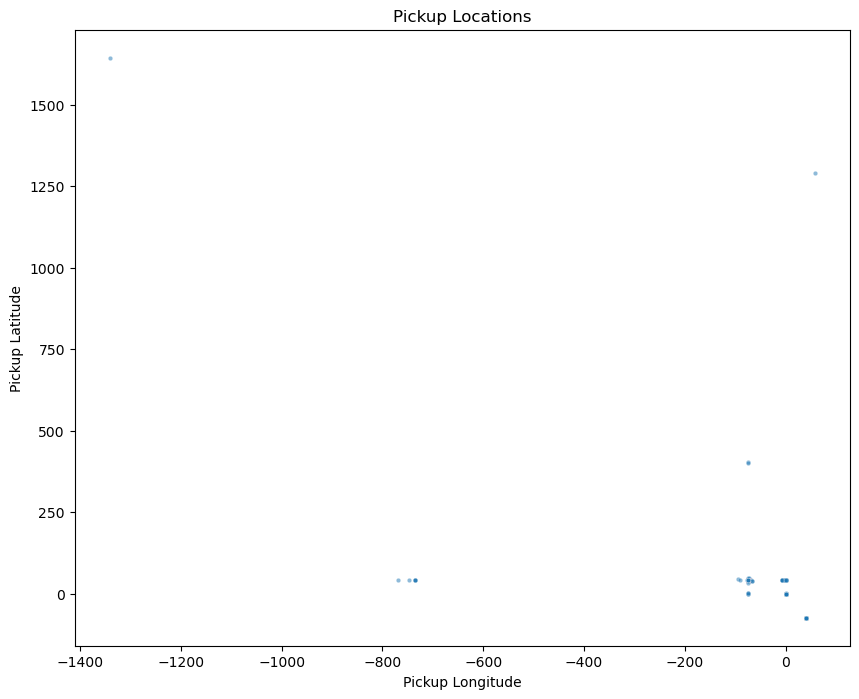

In [25]:
# Inspecting pickup and dropoff coordinates with a scatter plot (optional)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'], alpha=0.5, s=10)
plt.title('Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

# check for null values

In [27]:
pd.isnull(df).sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [31]:
# drop null values
df.dropna(inplace=True)

In [33]:
# change data type
df['dropoff_longitude'] = df['dropoff_longitude'].apply(lambda x: int(x) if pd.notnull(x) else 0)

In [35]:
# change data type
df['dropoff_latitude'] = df['dropoff_latitude'].apply(lambda x: int(x) if pd.notnull(x) else 0)

In [37]:
pd.isnull(df).sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [39]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [41]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-71.702324,39.188131,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.026506,6.697013,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.000000,-881.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.000000,40.000000,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.000000,40.000000,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.000000,40.000000,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.000000,872.000000,208.000000


# Feature Engineering

In [43]:
# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [45]:
# 1. Time-Based Features
# Extract hour of day
df['hour'] = df['pickup_datetime'].dt.hour

# Time of Day (morning, afternoon, evening, night)
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 22:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['hour'].apply(get_time_of_day)

# Day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Month
df['month'] = df['pickup_datetime'].dt.month

In [47]:
# 2. Distance Features
# Define function to calculate haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a)) 
    distance = R * c  # in kilometers
    return distance

df['distance_km'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                   row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Distance Categories (short, medium, long)
def categorize_distance(distance):
    if distance < 2:
        return 'short'
    elif distance < 10:
        return 'medium'
    else:
        return 'long'

df['distance_category'] = df['distance_km'].apply(categorize_distance)


In [50]:
# 3. Passenger-Related Features
# Passenger Count Categories
def categorize_passenger_count(count):
    if count == 1:
        return 'solo'
    elif count <= 3:
        return 'small group'
    else:
        return 'large group'

df['passenger_category'] = df['passenger_count'].apply(categorize_passenger_count)

In [49]:
# Optional: Display the transformed DataFrame
print(df[['pickup_datetime', 'hour', 'time_of_day', 'day_of_week', 'month', 'distance_km', 
          'distance_category', 'passenger_count', 'passenger_category']].head())

            pickup_datetime  hour time_of_day  day_of_week  month  \
0 2015-05-07 19:52:06+00:00    19     evening            3      5   
1 2009-07-17 20:04:56+00:00    20     evening            4      7   
2 2009-08-24 21:45:00+00:00    21     evening            0      8   
3 2009-06-26 08:22:21+00:00     8     morning            4      6   
4 2014-08-28 17:47:00+00:00    17     evening            3      8   

   distance_km distance_category  passenger_count passenger_category  
0   117.960662              long                1               solo  
1   116.850153              long                1               solo  
2   118.464508              long                1               solo  
3   120.688958              long                3        small group  
4   113.956319              long                5        large group  


# Split the Dataset

In [54]:
# Define your feature set and target variable
# Replace 'fare_amount' with your actual target variable
X = df.drop(columns=['fare_amount', 'Unnamed: 0', 'key'])  # Features (drop target and non-features)
y = df['fare_amount']  # Target variable

# Split the dataset into training and testing sets
# Adjust test_size to change the split ratio (e.g., 0.2 for 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Display the shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (159999, 13)
Testing set shape: (40000, 13)


# Data Scaling/Normalization

In [56]:
# Selecting columns to scale (e.g., distance_km, hour, passenger_count)
# Make sure to exclude categorical columns that don’t need scaling.
numeric_features = ['distance_km', 'hour', 'day_of_week', 'month', 'passenger_count']  # Example of numeric features

# Option 1: StandardScaler (standardization)
scaler_standard = StandardScaler()
X_train_scaled_standard = X_train.copy()
X_test_scaled_standard = X_test.copy()
X_train_scaled_standard[numeric_features] = scaler_standard.fit_transform(X_train[numeric_features])
X_test_scaled_standard[numeric_features] = scaler_standard.transform(X_test[numeric_features])

# Option 2: MinMaxScaler (normalization)
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = X_train.copy()
X_test_scaled_minmax = X_test.copy()
X_train_scaled_minmax[numeric_features] = scaler_minmax.fit_transform(X_train[numeric_features])
X_test_scaled_minmax[numeric_features] = scaler_minmax.transform(X_test[numeric_features])

# Display scaled training set
print("Standard Scaled Training Set:")
print(X_train_scaled_standard[numeric_features].head())

print("\nMin-Max Scaled Training Set:")
print(X_train_scaled_minmax[numeric_features].head())

Standard Scaled Training Set:
        distance_km      hour  day_of_week     month  passenger_count
157134    -0.022559  1.307129    -1.052736  0.791527        -0.487423
116607    -0.023890  1.153707    -1.566389 -0.371180        -0.487423
78783     -0.020009 -0.533939     1.001878 -0.952533         0.936234
103093    -0.025522  1.460551     1.001878  0.210173         0.224405
162400    -0.028938  0.079750    -0.025429 -1.243210         2.359891

Min-Max Scaled Training Set:
        distance_km      hour  day_of_week     month  passenger_count
157134     0.007245  0.956522     0.166667  0.727273         0.004808
116607     0.007214  0.913043     0.000000  0.363636         0.004808
78783      0.007303  0.434783     0.833333  0.181818         0.014423
103093     0.007177  1.000000     0.833333  0.545455         0.009615
162400     0.007099  0.608696     0.500000  0.090909         0.024038


# Correlation Analysis

Correlation Matrix:
                 fare_amount  distance_km      hour  day_of_week     month  \
fare_amount         1.000000     0.012526 -0.021463     0.007508  0.023813   
distance_km         0.012526     1.000000 -0.000419    -0.005117 -0.000707   
hour               -0.021463    -0.000419  1.000000    -0.086956 -0.003924   
day_of_week         0.007508    -0.005117 -0.086956     1.000000 -0.008785   
month               0.023813    -0.000707 -0.003924    -0.008785  1.000000   
passenger_count     0.010158    -0.001545  0.013187     0.033189  0.009774   

                 passenger_count  
fare_amount             0.010158  
distance_km            -0.001545  
hour                    0.013187  
day_of_week             0.033189  
month                   0.009774  
passenger_count         1.000000  


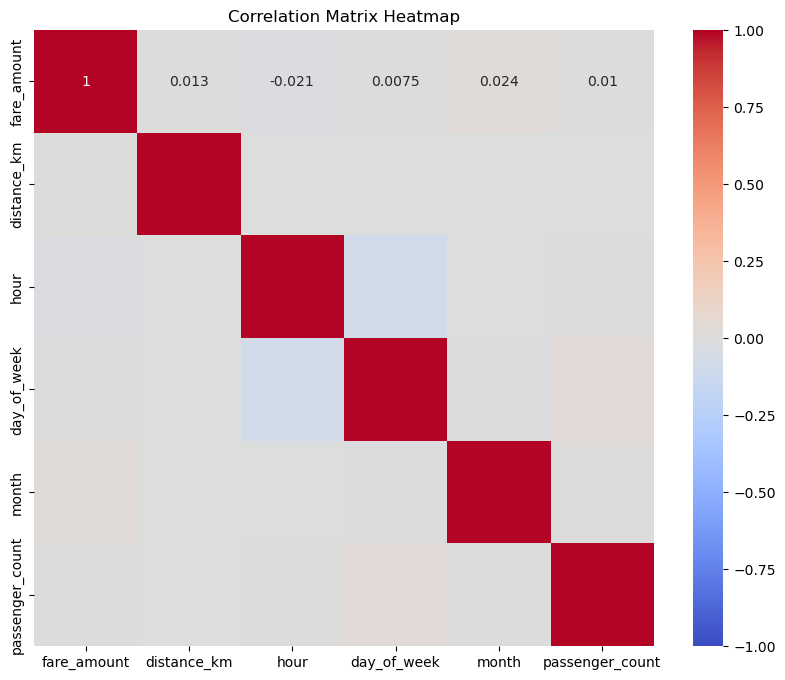


Correlation of Features with Fare Amount:
fare_amount        1.000000
month              0.023813
distance_km        0.012526
passenger_count    0.010158
day_of_week        0.007508
hour              -0.021463
Name: fare_amount, dtype: float64


In [58]:
# Select numeric columns for correlation analysis (excluding categorical and ID columns)
numeric_features = ['fare_amount', 'distance_km', 'hour', 'day_of_week', 'month', 'passenger_count']

# Compute the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Extract correlations with the target variable (fare_amount)
correlations_with_target = correlation_matrix['fare_amount'].sort_values(ascending=False)
print("\nCorrelation of Features with Fare Amount:")
print(correlations_with_target)

# Select and train the Regression Model

In [60]:
# Convert 'pickup_datetime' to datetime format if it's not already
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract features from 'pickup_datetime'
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

# Drop the original 'pickup_datetime' column as it's now represented by numeric features
df = df.drop(columns=['pickup_datetime'])


In [62]:
# Select only numeric columns for model training
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns].drop(columns=['fare_amount'])  # assuming 'fare_amount' is the target
y = df['fare_amount']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
# Dictionary to store models and their performance
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42, n_estimators=100),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Train each model and evaluate on the test set
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'Mean Squared Error': mse, 'R^2 Score': r2}
    
    print(f"\n{model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

# Optional: Display all model performance results
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['Mean Squared Error']}, R^2 = {metrics['R^2 Score']}")


Linear Regression
Mean Squared Error: 102.8050955283145
R^2 Score: 0.00026004956086356223

Decision Tree Regression
Mean Squared Error: 146.94029847333334
R^2 Score: -0.4289377968894794

Random Forest Regression
Mean Squared Error: 80.89515753317382
R^2 Score: 0.21332575620527439

Support Vector Regression
Mean Squared Error: 111.5313237208684
R^2 Score: -0.084599158009657

Model Performance Summary:
Linear Regression: MSE = 102.8050955283145, R^2 = 0.00026004956086356223
Decision Tree Regression: MSE = 146.94029847333334, R^2 = -0.4289377968894794
Random Forest Regression: MSE = 80.89515753317382, R^2 = 0.21332575620527439
Support Vector Regression: MSE = 111.5313237208684, R^2 = -0.084599158009657


# Recommendation

## Based on the evaluation metrics provided for each model, let's analyze which regression model performs best:

Model Evaluation Summary
Linear Regression

Mean Squared Error (MSE): 102.81
R² Score: ~0.00026
Interpretation: The very low R² score indicates that Linear Regression barely explains any variance in the target (fare_amount). This suggests that a simple linear relationship isn’t capturing the complexity in the data, which is why Linear Regression might not be suitable here.
Decision Tree Regression

Mean Squared Error (MSE): 146.94
R² Score: -0.429
Interpretation: The negative R² score implies that this model performs worse than simply predicting the mean fare amount for all instances. The high MSE also suggests that the Decision Tree is struggling to generalize in this case, likely due to overfitting on the training data.
Random Forest Regression

Mean Squared Error (MSE): 80.90
R² Score: ~0.213
Interpretation: The Random Forest model has the lowest MSE and the highest R² score, indicating it captures more variance in fare_amount than the other models. However, an R² of ~0.213 is still relatively low, meaning that there may still be features or patterns not captured well by this model.
Recommendation
Based on these results:

Random Forest Regression is the best model among the three** as it has the lowest MSE and the highest R² score. Despite the low R², it performs better than Linear Regression and Decision Tree Regression in terms of predictive accuracy.

# Evaluate the Regression Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Step 1: Load your dataset
# Replace 'your_data.csv' with the path to your dataset file
try:
    data = pd.read_csv('uber.csv')  # Load your dataset
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct path to your dataset.")
    raise

# Step 2: Take a smaller sample of the dataset (e.g., 1% of the data)
sampled_data = data.sample(frac=0.01, random_state=42)  # Adjust `frac` as needed
print("Sampled data successfully.")
print(f"Sampled data size: {sampled_data.shape}")

# Step 3: Select features and target
try:
    X = sampled_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
    y = sampled_data['fare_amount']
    print("Features and target selected.")
except KeyError as e:
    print(f"Error: {e}")
    print("Ensure these columns are present in your data.")
    raise e

# Step 4: Split the sampled data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("Data split into training and testing sets.")
except Exception as e:
    print(f"Error during train-test split: {e}")
    raise e

# Step 5: Define and train the Random Forest model on the smaller sample
try:
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    print("Model training completed.")
except Exception as e:
    print(f"Error during model training: {e}")
    raise e

# Step 6: Store the model in a dictionary
models = {
    "Random Forest Regression": rf_model
}
print("Model stored in dictionary.")

# Step 7: Function to evaluate the model with MSE, MAE, and R-squared metrics
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print("Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")

# Step 8: Make predictions and evaluate the Random Forest model
try:
    y_pred_rf = models["Random Forest Regression"].predict(X_test)
    print("Model prediction completed.")
    evaluate_model(y_test, y_pred_rf)
except Exception as e:
    print(f"Error during model prediction or evaluation: {e}")


Dataset loaded successfully.
Sampled data successfully.
Sampled data size: (2000, 9)
Features and target selected.
Data split into training and testing sets.
Model training completed.
Model stored in dictionary.
Model prediction completed.
Model Evaluation Metrics:
Mean Squared Error (MSE): 26.02
Mean Absolute Error (MAE): 2.68
R-Squared (R²): 0.70


# Fine-tuning the Model

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [85]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt'],     # Number of features considered for split
}


In [ ]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Metric for optimization
    cv=5,                              # 5-fold cross-validation
    verbose=2,                         # Progress output
    n_jobs=-1                          # Parallelize
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Extract best parameters and model
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,                         # Number of parameter combinations to try
    scoring='neg_mean_squared_error',  # Metric for optimization
    cv=5,                              # 5-fold cross-validation
    verbose=2,                         # Progress output
    random_state=42,                   # Reproducibility
    n_jobs=-1                          # Parallelize
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Extract best parameters and model
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)


In [ ]:
# Predict on test set using the fine-tuned model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")

# Call the evaluation function
evaluate_model(y_test, y_pred_rf_tuned)
